In [2]:
import numpy as np     #library we use for mathematical operations
import pandas as pd    # so that we can create a large dataframe because set, dict. , array cant handle.
import matplotlib.pyplot as plt   #for graphs( . pyplot means only a package we are using here)
import seaborn as sns

In [3]:
tt = pd.read_csv('titanic.csv')

In [4]:
tt.shape   # array 2D

(891, 12)

In [5]:
tt.describe()   # we get to know stat of the data 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tt.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# removing the cabin coloum as it has 70% null value
tt = tt.drop('Cabin', axis=1)

In [9]:
tt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
# replaceing the null value in age coloumn 
tt['Age'].fillna(np.mean(tt['Age']), inplace= True)

In [11]:
# replacing the null value of embarked with mode
md = tt.Embarked.mode()[0]
tt['Embarked'].fillna(md,inplace = True)

In [12]:
tt.drop(['PassengerId','Name'], axis=1, inplace=True)

In [13]:
# Encoding for the character coloumn (sex, embarked)
grnder = pd.get_dummies(tt['Sex'], drop_first=True)

In [14]:
Embarked = pd.get_dummies(tt['Embarked'], drop_first=True)

In [15]:
tt.drop(['Ticket','Sex','Embarked'], axis=1 , inplace=True)

In [16]:
grnder

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [17]:
tt = pd.concat([tt,grnder,Embarked], axis=1)

In [18]:
tt

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,1
889,1,1,26.000000,0,0,30.0000,1,0,0


# Visual Analysis With Titanic 

<Axes: xlabel='Survived', ylabel='count'>

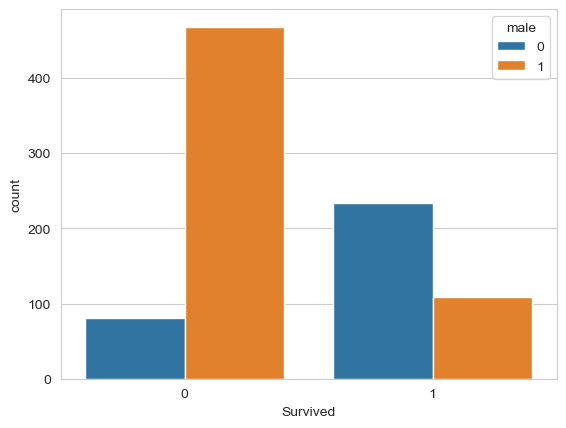

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='male',data=tt)

<Axes: xlabel='Survived', ylabel='count'>

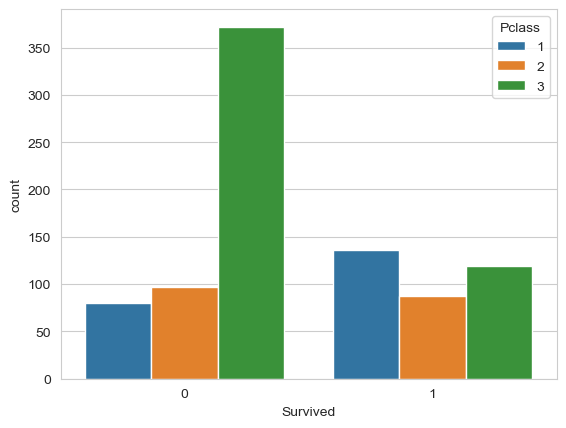

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=tt)

<Axes: >

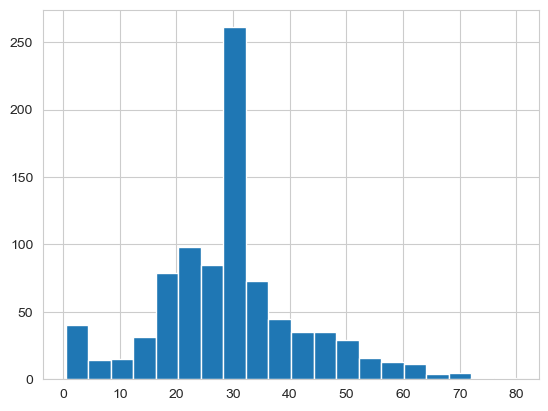

In [21]:
# FREQUENCY DISTRIBUTION OF AGES OF PASSENGER ON TITANIC
tt['Age'].hist(bins=20)

<function matplotlib.pyplot.show(close=None, block=None)>

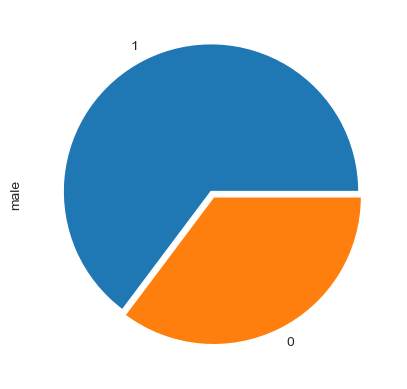

In [22]:
tt['male'].value_counts().plot.pie(explode=([0.02,0.02]))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

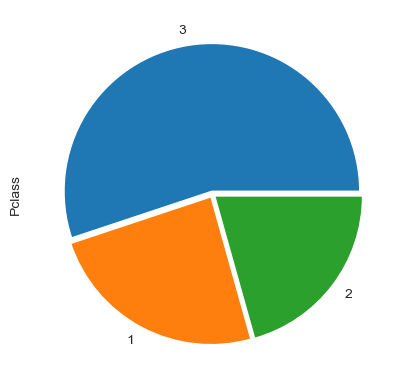

In [23]:
tt['Pclass'].value_counts().plot.pie(explode=([0.02,0.02,0.02]))
plt.show

In [24]:
tt.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [25]:
x = tt.loc[:,['Pclass','Age','SibSp','Parch','Fare','Q','S']]
y = tt.loc[:,'male']

In [26]:
x.shape

(891, 7)

In [27]:
y.shape

(891,)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [30]:
x_train.shape

(712, 7)

In [31]:
y_train.shape

(712,)

### 1. classification using decision tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(x_test)

In [35]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1], dtype=uint8)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)*100

66.4804469273743

### 2. classification with support vector machine (svm)

In [39]:
from sklearn.svm import SVC

In [40]:
supp = SVC()
supp.fit(x_train,y_train)

SVC()

In [41]:
y_pred = model.predict(x_test)

In [42]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1], dtype=uint8)

In [43]:
accuracy_score(y_test,y_pred)*100

66.4804469273743

### 3. classification with k nearest neighbours (knn) 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred = model.predict(x_test)

In [48]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1], dtype=uint8)

In [49]:
accuracy_score(y_test,y_pred)*100

59.77653631284916

### 4. classification using nive bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [53]:
y_pred = model.predict(x_test)

In [54]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1], dtype=uint8)

In [55]:
accuracy_score(y_test,y_pred)*100

59.77653631284916

### 5. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Saloni Kansal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = model.predict(x_test)

In [59]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1], dtype=uint8)

In [60]:
accuracy_score(y_pred,y_test)*100

59.77653631284916